## **Data Cleaning of the Telcom Churn Dataset**

#### **Initial Import and Observations**

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
display(df.head())
print(df.shape)

print(df.dtypes)

'''There is an issue with the TotalCharges column. When visualizing the values in the dataframe output, it appears as if TotalCharges contains decimal/float values like 29.85, so the data type for that column should be float64. 
   In the data type output, however, we are seeing object instead of float64. This is very unexpected so we will explore the TotalCharges column further. Specifically, we will look for empty values, like ' ' 
   '''

print(f'\nThe number of null values in the dataset {df.isnull().sum().sum()}')


num_null_values = 0

for i in range(len(df)):
    if df['TotalCharges'][i] == ' ':

        # Print the index where we see a null value
        print(i, end = ' ')
        num_null_values += 1


print(f'\n\nNumber of missing values in TotalCharges column: {num_null_values}\n')

'''As can be seen from the above output, we have missing values in the TotalCharges column. This is likely the reason for why TotalCharges was imported as object and not float64. 
   To handle this, we will convert the TotalCharges column to float64 and remove the rows which contain a null value from the dataframe'''

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f'\nThe number of null values in the dataset {df.isnull().sum().sum()}') # 11 null values as expected, arising from the TotalCharges column

# Use the deletion technique to handle rows with missing data (i.e. NaN). That is, remove all rows with missing values from the dataframe
df = df.dropna()


'''Additionally, upon viewing the output, the SeniorCitizen column should be object instead of int64 since a person is either a senior citizen (yes) or is not (no).
   We will address this as such'''

df['SeniorCitizen'] = df['SeniorCitizen'].replace({0 : 'No', 1 : "Yes"})
display(df.head())
print(df.dtypes)
# This should now be (7032, 21) instead of (7043, 21) since we removed 11 rows 
print(df.shape)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


(7043, 21)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The number of null values in the dataset 0
488 753 936 1082 1340 3331 3826 4380 5218 6670 6754 

Number of missing values in TotalCharges column: 11


The number of null values in the dataset 11


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
(7032, 21)


In [4]:
df["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

#### **Initial Remarks**
- Initially, we noticed no null values in the dataset. When looking into the datatypes, however, we saw a few issues:
    - TotalCharges column which seemingly contains numerical decimal/float values was listed as an object type. This was unexpected as it should have been imported as a float64 type. Upon examining the values of this column, we detected 11 instances of missing values represented by " ". This is likely what caused TotalCharges to be imported as object. To fix this, we converted TotalCharges to float64 via the pd.to_numeric() function and to handle the 11 missing values we used the deletion technique. As such, we removed 11 rows from our dataset. This means that our dataset has 7032 rows now instead of 7043. It is important to note that we could have used other techniques to handle the missing values, like imputation for which we could have replaced the missing values with something like the mean of the TotalCharges column, but since there were only 11 missing instances out of 7043 we would not lose too much information/data by just removing those 11 instances in addition to preventing any bias/inaccuracy added to our data through imputation. 

    - SeniorCitizen column was imported as int64. This is not entirely intuitive as a person either is or is not a senior citizen, so to be consistent with the values of the other columns in the dataset we should represent whether or not a person is a senior citizen with "Yes"/"No" values instead of 1 and 0. This was handled in the code above. 
- We also notice that in the above output, 18 of the 21 columns are listed as "object" meaning that they contain some kind of categorical information as the values that feature/column can take.
    - Our machine learning models require numerical input, so categorical features, like gender which just has values Male/Female must be encoded as numerical features before fitting a model. 
    - Not all features will need to be encoded. For example, the customerID feature is unlikely to have any importance in predicting churn as it is simply an identifier for a customer. As such, since we will not be using this feature in our model, we will not encode it in the following pre-processing steps. 
    - **Note that tree based models can work with categorical variables just fine**


In [5]:
from imblearn.over_sampling import SMOTE

X, y = df.drop(columns=["Churn"], axis=1), np.ravel(df[["Churn"]])
smote = SMOTE(random_state=123)

X_encoded = pd.get_dummies(X)

X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

df = pd.DataFrame(X_resampled, columns=X_encoded.columns)
df['Churn'] = y_resampled

# Step 6: Revert one-hot encoded columns back to original categorical columns
# Identify the original categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a dictionary to hold the original categorical columns
original_categorical_data = {}

for col in categorical_columns:
    one_hot_cols = [c for c in df.columns if c.startswith(col + '_')]
    original_categorical_data[col] = df[one_hot_cols].idxmax(axis=1).str[len(col) + 1:]
    df.drop(columns=one_hot_cols, inplace=True)

# Concatenate the original categorical columns back to the DataFrame
df = pd.concat([df, pd.DataFrame(original_categorical_data)], axis=1)

/tmp/ipykernel_4067/745731796.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Churn'] = y_resampled


In [6]:
df["Churn"].value_counts()

Churn
No     5163
Yes    5163
Name: count, dtype: int64

In [7]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,1,29.85,29.85,No,7590-VHVEG,Female,No,Yes,No,No,...,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,34,56.95,1889.50,No,5575-GNVDE,Male,No,No,No,Yes,...,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,2,53.85,108.15,Yes,3668-QPYBK,Male,No,No,No,Yes,...,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,45,42.30,1840.75,No,7795-CFOCW,Male,No,No,No,No,...,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,2,70.70,151.65,Yes,9237-HQITU,Female,No,No,No,Yes,...,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


#### **Encode Categorical Features as Numeric Features**

In the following encoding, we will be using one hot encoding as for all of the categorical features there is no ordinal relationship between the categories. For instance, for something like gender, there is no relationship between the categories "Male" and "Female". One hot encoding is well suited for these nominal relationships, so we will use it as such. 

In [8]:
from sklearn.preprocessing import OneHotEncoder

'''We first separate out the categorical features and numeric features.
   We do this because one hot encoding will only be applied to the categorical features.'''
categorical_data = df.select_dtypes(include = [object])
numerical_data = df.select_dtypes(exclude = [object])
display(numerical_data.head())
print(numerical_data.shape)

# Customer ID is not a particularly useful column for our analysis. Remove it as such since it doesnt need to be encoded. 
categorical_data = categorical_data.drop('customerID', axis = 1) 

display(categorical_data.head())
print(categorical_data.shape)

'''Initialize the one hot encoder and apply it to the categorical features to encode them'''
onehot_encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'error')
categorical_data_encoded = onehot_encoder.fit_transform(categorical_data)
print(categorical_data_encoded)

'''Put the encoded features into a dataframe'''
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_data.columns)
categorical_data_encoded_df = pd.DataFrame(categorical_data_encoded, columns = encoded_feature_names)
categorical_data_encoded_df.index = df.index
display(categorical_data_encoded_df.head())

'''Join the encoded features with the numerical features'''
encoded_df = numerical_data.join(categorical_data_encoded_df)
print(encoded_df.dtypes)
display(encoded_df.head())
print(encoded_df.shape)



,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


(10326, 3)


,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,No,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,No,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Yes,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,No,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Yes,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


(10326, 17)
[[1. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 0. 1.]]


,Churn_No,Churn_Yes,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn_No                                   float64
Churn_Yes                                  float64
gender_Female                              float64
gender_Male                                float64
SeniorCitizen_No                           float64
SeniorCitizen_Yes                          float64
Partner_No                                 float64
Partner_Yes                                float64
Dependents_No                              float64
Dependents_Yes                             float64
PhoneService_No                            float64
PhoneService_Yes                           float64
MultipleLines_No                           float64
MultipleLines_No phone service             float64
MultipleLines_Yes                          float64
InternetService_DSL                        float64
InternetService_Fiber optic    

,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,34,56.95,1889.50,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,53.85,108.15,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,45,42.30,1840.75,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2,70.70,151.65,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


(10326, 48)


#### **Remarks on One Hot Encoding**

- We separated the numerical features from the categorical features as we do not need to apply encoding to numeric features. 
- For the categorical features, we set up the one hot encoder and applied it to all categorical features.
    - For each categorical feature, one column gets created for each category. For instance, for the gender feature with two categories, "Male" and "Female", one column gets created for the Male gender and another column gets created for the female gender. 
- We ended up with an additional 45 columns being generated by the one hot encoding process. This results in a total of 48 columns/features for our dataset instead of the 21 that we started with. As a result, while it is clear that the dimensionality of our dataset increased it is important to note that we still have many more instances/rows than columns/features as there are 7032 rows and 48 features. Thus, we should not face too many issues with overfitting upon developing our models but we should look into dimensionality reduction techniques like PCA to see if it is feasible to reduce the dimensionality/number of columns as that would improve the performance of our models. 

#### **Export Dataset Containing the Results of Encoding to csv**

In [3]:
# Commenting this out so I dont keep generating copies of this dataset. 

# encoded_df.to_csv('Telecommunications_CustomerChurn_Dataset_OneHotEncoded.csv', index = False)

#### **Feature Selection From Shayan**

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV 

# Splitting into training and test sets
encoded_df = encoded_df.drop(columns = ['Churn_No'])
X =  encoded_df.drop(columns=['Churn_Yes'], axis=1)
y = encoded_df[['Churn_Yes']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Creating pre-processing pipeline with scaling, feature selection, and feature extraction
scaler = StandardScaler()
estimator = SVC(kernel='linear', random_state=123)
rfecv = RFECV(estimator, step=1)

pipeline = Pipeline(steps=[('scaler', scaler), ('rfecv', rfecv)])
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfecv',
                 RFECV(estimator=SVC(kernel='linear', random_state=123)))])

In [11]:
print(len(X.columns[pipeline['rfecv'].support_]))
print()
print(pipeline.score(X_test, y_test))

# Score from estimator with all the features
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

estimator.fit(X_train_scaled, np.ravel(y_train))
estimator.score(X_test_scaled, np.ravel(y_test))


41

0.8238141335914811


0.8238141335914811

#### **Feature Extraction from Shayan**

41 features now down from 48 originally (technically 47 since we are not counting churn as an input feature)

In [12]:
from sklearn.decomposition import PCA

X_selected_train = X_train[X.columns[pipeline['rfecv'].support_]]
X_selected_test = X_test[X.columns[pipeline['rfecv'].support_]]

pca_41 = PCA(n_components=41, random_state=123)
clf_26 = SVC(kernel='linear', random_state=123)
scaler =  StandardScaler()

pca_41_pipeline = Pipeline([('scaler', scaler), ('pca_41', pca_41), ('clf_26', clf_26)])
pca_41_pipeline.fit(X_selected_train, np.ravel(y_train))


Pipeline(steps=[('scaler', StandardScaler()),
                ('pca_41', PCA(n_components=41, random_state=123)),
                ('clf_26', SVC(kernel='linear', random_state=123))])

In [13]:
pca_41_pipeline.score(X_selected_train, y_train)


0.8309927360774818

#### **Scree Plot**

Text(0, 0.5, 'Explained Variance')

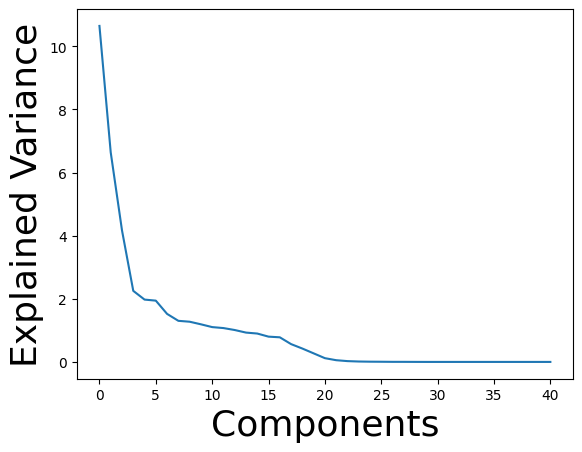

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(pca_41.explained_variance_)
plt.xlabel('Components', size=26)
plt.ylabel('Explained Variance', size=26)

As can be seen from the above plot, the explained variance decreases significantly from 5-10 components onwards. We will use 5 components initially. 

In [15]:
scaler = StandardScaler()
pca_5 = PCA(n_components=5, random_state=123)
clf_5 = SVC(kernel='linear')

pca_5_pipeline = Pipeline([('scaler', scaler), ('pca_5', pca_5), ('clf', clf_5)])
pca_5_pipeline.fit(X_selected_train, np.ravel(y_train))

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca_5', PCA(n_components=5, random_state=123)),
                ('clf', SVC(kernel='linear'))])

In [16]:
pca_5_pipeline.score(X_selected_test, y_test)


0.7928363988383349

In [17]:
# Transform the training data using the pipeline
X_transformed = pca_5_pipeline.named_steps['pca_5'].transform(pca_5_pipeline.named_steps['scaler'].transform(X_selected_train))

# Convert the transformed data to a DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=[f'PC{i+1}' for i in range(X_transformed.shape[1])])

# Add the y_train labels to the DataFrame
X_transformed_df['label'] = y_train.astype(int).values

# Export the transformed data to a CSV file
X_transformed_df.to_csv('pca_transformed_output.csv', index=False)

From this PCA run, we are able to reduce the feature space from 26 features down to 5, with a minor decrease in accuracy from 83.10% to 79.74%